<a href="https://colab.research.google.com/github/JesusJuarez1/CatDog_classiffier/blob/main/CatDog_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importar librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files


In [ ]:
#montamos disco
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/Cat_Dog/imagenes/train"
test_path  = "/content/drive/MyDrive/Cat_Dog/imagenes/test"

class_names = sorted(os.listdir(train_path))
print(f"Class Names : {class_names}")

Class Names : ['.ipynb_checkpoints', '0', '1']


In [ ]:
label_to_text = {0 : 'Cat', 1: 'Dog'}

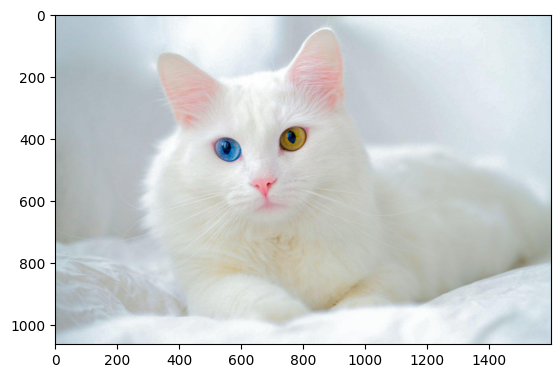

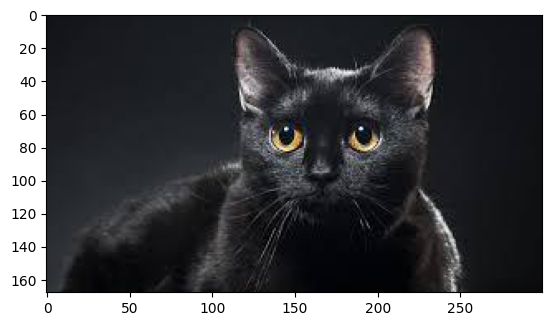

In [ ]:
#mostramos una imagen
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Obtener una lista de nombres de archivo de las imágenes en el directorio
image_files = os.listdir(train_path+"/0")

# Seleccionar una imagen aleatoria
random_image = random.choice(image_files)

# Ruta completa de la imagen seleccionada
image_path = os.path.join(train_path+"/0", random_image)

# Leer la imagen y mostrarla
imagen = mpimg.imread(image_path)
plt.imshow(imagen)
plt.show()

#o una predeterminada
imagen2 = mpimg.imread(train_path+"/0/cat_101.jpg")
plt.imshow(imagen2)
plt.show()


#crear dataframes

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#train_path = "/content/drive/MyDrive/Cat_Dog/imagenes/train"
#test_path = "/content/drive/MyDrive/Cat_Dog/imagenes/test"

# Obtener la lista de categorías (cats/dogs)
categories = ["0", "1"]

# Listas para almacenar los datos de las imágenes de entrenamiento y prueba
train_data = []
test_data = []

# Recorrer las categorías y las rutas de entrenamiento y prueba
for category in categories:
    train_dir = os.path.join(train_path, category)
    test_dir = os.path.join(test_path, category)
    
    # Obtener la lista de nombres de archivo de las imágenes de entrenamiento y prueba
    train_files = os.listdir(train_dir)
    test_files = os.listdir(test_dir)
    
    # Recorrer las imágenes de entrenamiento
    for file in train_files:
        image_path = os.path.join(train_dir, file)
        
        # Leer la imagen y obtener sus características
        imagen = mpimg.imread(image_path)
        if len(imagen.shape) == 2:
            width, height = imagen.shape
            channels = 1
        else:
            width, height, channels = imagen.shape
        
        # Agregar las características y la categoría a la lista de datos de entrenamiento
        train_data.append([image_path, width, height, channels, category])
    
    # Recorrer las imágenes de prueba
    for file in test_files:
        image_path = os.path.join(test_dir, file)
        
        # Leer la imagen y obtener sus características
        imagen = mpimg.imread(image_path)
        if len(imagen.shape) == 2:
            width, height = imagen.shape
            channels = 1
        else:
            width, height, channels = imagen.shape
        
        # Agregar las características y la categoría a la lista de datos de prueba
        test_data.append([image_path, width, height, channels, category])

# Crear los dataframes de entrenamiento y prueba
train_df = pd.DataFrame(train_data, columns=["image_path", "width", "height", "channels", "category"])
test_df = pd.DataFrame(test_data, columns=["image_path", "width", "height", "channels", "category"])

# Mostrar una muestra de los dataframes de entrenamiento y prueba
print("Dataframe de entrenamiento:")
print(train_df.head())
print("\nDataframe de prueba:")
print(test_df.head())

train_df.to_csv("/content/drive/MyDrive/Cat_Dog/imagenes/entrenamiento.csv")

Dataframe de entrenamiento:
                                          image_path  width  height  channels  \
0  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    252     400         3   
1  /content/drive/MyDrive/Cat_Dog/imagenes/train/...   1024    1536         3   
2  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    409     615         3   
3  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    810    1440         3   
4  /content/drive/MyDrive/Cat_Dog/imagenes/train/...   1000    1500         3   

  category  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataframe de prueba:
                                          image_path  width  height  channels  \
0  /content/drive/MyDrive/Cat_Dog/imagenes/test/0...    181     278         3   
1  /content/drive/MyDrive/Cat_Dog/imagenes/test/0...    183     276         3   
2  /content/drive/MyDrive/Cat_Dog/imagenes/test/0...    202     360         3   
3  /content/drive/MyDrive/Cat_Dog/imagenes/test/0...   1200  

In [ ]:
# Imprimir toda la información del dataframe de entrenamiento
print("Dataframe de entrenamiento:")
print(train_df)

Dataframe de entrenamiento:
                                            image_path  width  height  \
0    /content/drive/MyDrive/Cat_Dog/imagenes/train/...    252     400   
1    /content/drive/MyDrive/Cat_Dog/imagenes/train/...   1024    1536   
2    /content/drive/MyDrive/Cat_Dog/imagenes/train/...    409     615   
3    /content/drive/MyDrive/Cat_Dog/imagenes/train/...    810    1440   
4    /content/drive/MyDrive/Cat_Dog/imagenes/train/...   1000    1500   
..                                                 ...    ...     ...   
552  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    475     632   
553  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    225     225   
554  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    183     275   
555  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    688    1000   
556  /content/drive/MyDrive/Cat_Dog/imagenes/train/...    168     300   

     channels category  
0           3        0  
1           3        0  
2           3       

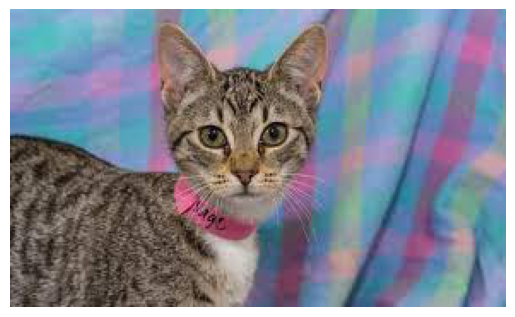

In [ ]:
import random
import matplotlib.pyplot as plt

# Obtener una muestra aleatoria del dataframe
random_sample = train_df.sample(n=1)

# Obtener la ruta de la imagen aleatoria
image_path = random_sample['image_path'].values[0]

# Leer y mostrar la imagen
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

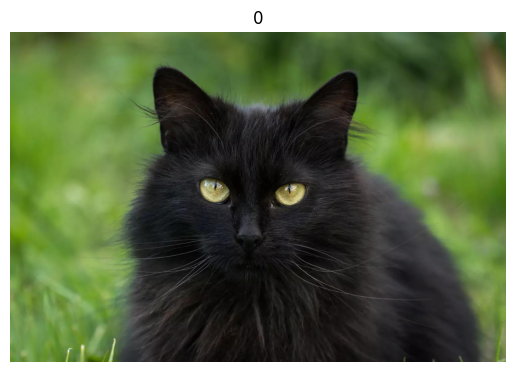

In [ ]:
import random
import matplotlib.pyplot as plt

# Obtener una muestra aleatoria del dataframe
random_sample = train_df.sample(n=1)

# Obtener la ruta de la imagen aleatoria y su clase
image_path = random_sample['image_path'].values[0]
image_class = random_sample['category'].values[0]

# Leer y mostrar la imagen
image = mpimg.imread(image_path)
plt.imshow(image)
plt.title(image_class)
plt.axis('off')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Contar la cantidad de perros y gatos en train_df
counts = train_df['category'].value_counts()

# Crear el diagrama de barras
fig = go.Figure([go.Bar(x=counts.index, y=counts)])

# Personalizar la apariencia del diagrama de barras
fig.update_traces(marker_color='rgb(0,200,0)',
                  marker_line_color='rgb(0,255,0)',
                  marker_line_width=1.5, opacity=0.6)

# Mostrar el diagrama de barras
fig.show()


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  557 non-null    object
 1   width       557 non-null    int64 
 2   height      557 non-null    int64 
 3   channels    557 non-null    int64 
 4   category    557 non-null    object
dtypes: int64(3), object(2)
memory usage: 21.9+ KB


#creacion de modelo

In [ ]:
#eliminamos columnas inutiles
train = train_df.drop(columns=['width','height','channels'])
train.shape

test = test_df.drop(columns=['width','height','channels'])
test.shape

(140, 2)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  557 non-null    object
 1   category    557 non-null    object
dtypes: object(2)
memory usage: 8.8+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  140 non-null    object
 1   category    140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [ ]:
train['category'] = train['category'].apply(lambda x: str(x))

In [ ]:
#crear generador de imagenes
from keras.preprocessing.image import ImageDataGenerator

#creamos un generador de datos que escala los datos de 0 a 1 y 
#haga una divicion de validacion 0.15

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.25,
                             rotation_range=10,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.1,
                             shear_range=0.1,
                             channel_shift_range=0.1,
                             brightness_range=[0.95, 1.05])

In [ ]:
%ls

drive/  sample_data/


In [ ]:
from plotly import data
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory=train_path,
    x_col='image_path',
    y_col='category',
    subset='training',
    batch_size=8,
    shuffle=True,
    class_mode="categorical",
    target_size=(256, 256)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory=train_path,
    x_col='image_path',
    y_col='category',
    subset='validation',
    batch_size=8,
    shuffle=True,
    class_mode="categorical",
    target_size=(256, 256)
)

#crear generador de datos para imagenes de prueba
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = datagen.flow_from_dataframe(
    dataframe = test,
    directory = "test_path",
    x_col = 'image_path',
    y_col = 'category',
    batch_size = 8,
    shuffle = False,
    class_mode = "categorical",
    target_size = (256,256)
)

Found 418 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.
Found 140 validated image filenames belonging to 2 classes.


In [ ]:
#descargamos base de datos por transferencia
basemodel = ResNet50(weights= 'imagenet', include_top = False, input_tensor= Input(shape=(256,256,3)))


In [ ]:
##congelamos pesos del modelo
for layer in basemodel.layers:
  layers.trainable = True

In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Verificar muestras de datos de entrenamiento
for image_path, label in zip(train['image_path'].head(), train['category'].head()):
    print('Image:', image_path)
    print('Label:', label)
    # Puedes agregar código para cargar y mostrar la imagen si es necesario


Image: /content/drive/MyDrive/Cat_Dog/imagenes/train/0/cat_137.jpg
Label: 0
Image: /content/drive/MyDrive/Cat_Dog/imagenes/train/0/cat_276.jpg
Label: 0
Image: /content/drive/MyDrive/Cat_Dog/imagenes/train/0/cat_195.jpg
Label: 0
Image: /content/drive/MyDrive/Cat_Dog/imagenes/train/0/cat_333.jpg
Label: 0
Image: /content/drive/MyDrive/Cat_Dog/imagenes/train/0/cat_201.jpg
Label: 0


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4, 4))(headmodel)
headmodel = Flatten(name='flatten')(headmodel)
headmodel = Dense(8, activation='relu')(headmodel)
headmodel = Dense(4, activation='relu')(headmodel)
headmodel = Dense(2, activation='softmax')(headmodel)
model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
#compilamos el modelo
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd', metrics = ["accuracy"])

In [ ]:
#utilizamos parada temprana para salir de entrenamieto si el loss aumenta mucho
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', verbose=1, patience=10)

#guardamos el mejor modelo con menor perdida de validacion
checkpointer = ModelCheckpoint(filepath="prueba.hdf5",
                               verbose=1,save_best_only=True)

In [ ]:
history = model.fit(train_generator,
                    epochs = 50, 
                    validation_data=valid_generator,
                    callbacks=[checkpointer,earlystopping])

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.2592 - accuracy: 0.9474
Epoch 1: val_loss improved from inf to 0.50341, saving model to prueba.hdf5
53/53 [==============================] - 22s 419ms/step - loss: 0.2592 - accuracy: 0.9474 - val_loss: 0.5034 - val_accuracy: 1.0000
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.2202 - accuracy: 0.9569
Epoch 2: val_loss improved from 0.50341 to 0.46593, saving model to prueba.hdf5
53/53 [==============================] - 21s 398ms/step - loss: 0.2202 - accuracy: 0.9569 - val_loss: 0.4659 - val_accuracy: 0.9928
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.9593
Epoch 3: val_loss did not improve from 0.46593
53/53 [==============================] - 21s 404ms/step - loss: 0.2239 - accuracy: 0.9593 - val_loss: 0.5670 - val_accuracy: 0.8345
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9498
Epoch 4: val_loss improve

In [ ]:
#guardar la arquitectura del modelo en un arhivo json para poderlo
#utilizar en el futuro
model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
#cargar modelo preentrenado
with open('classifier-resnet-model.json',"r") as json_file:
  json_saveModel = json_file.read()

#carga
model = tf.keras.models.model_from_json(json_saveModel)
model.load_weights('prueba.hdf5')
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', metrics = ["accuracy"])

In [ ]:
result = model.evaluate(test_generator)
print("Accuracy : {}".format(result[1]))

18/18 [==============================] - 7s 269ms/step - loss: 0.6448 - accuracy: 0.9071
Accuracy : 0.9071428775787354


In [ ]:
# Obtenemos las claves del modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

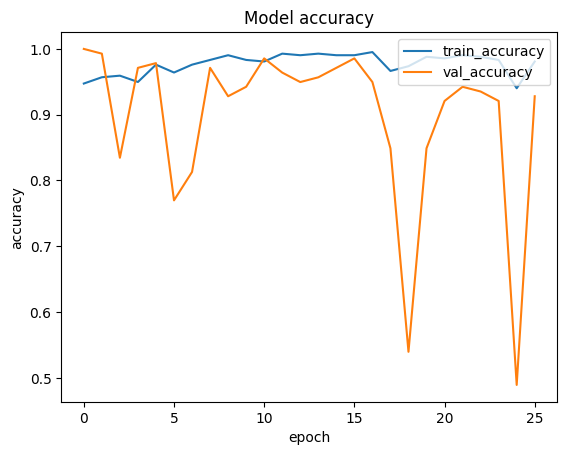

In [ ]:
#Representamos los resultados del entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc="upper right")
plt.show()

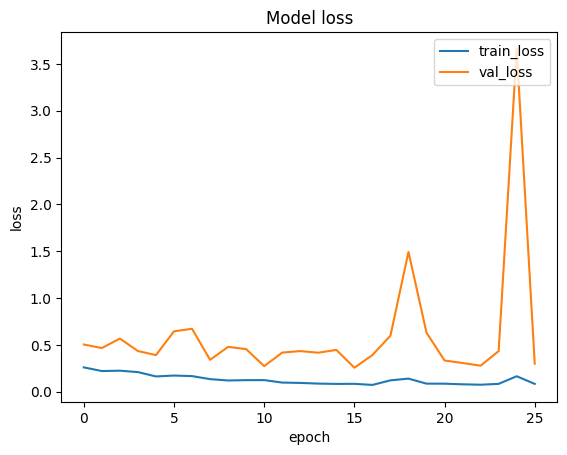

In [ ]:
#Representamos los resultados del entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc="upper right")
plt.show()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

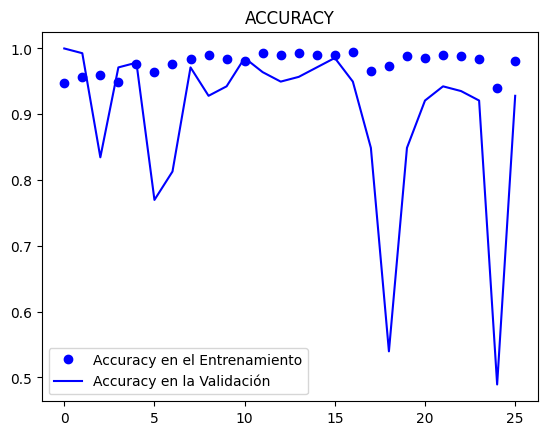

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy en el Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy en la Validación')
plt.title('ACCURACY')
plt.legend()

In [ ]:
import cv2
import numpy as np

# Cargar y redimensionar las imágenes
images = []
for image_path in test['image_path']:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    images.append(image)

y = []
for category in test['category']:
  y.append(category)

# Convertir la lista de imágenes en un arreglo numpy
images = np.array(images)

# Normalizar las imágenes (opcional)
images = images / 255.0  # Dividir por 255 para que los valores estén en el rango [0, 1]

y = np.array(y)


In [ ]:
from keras.utils import to_categorical

# Convertir las categorías en representación one-hot
y_one_hot = to_categorical(y)

predicted_classes = np.argmax(model.predict(images), axis=-1)
# Obtener y_true como las etiquetas reales correspondientes a las predicciones
y_true = np.argmax(y_one_hot, axis=-1)

5/5 [==============================] - 3s 255ms/step


<Axes: >

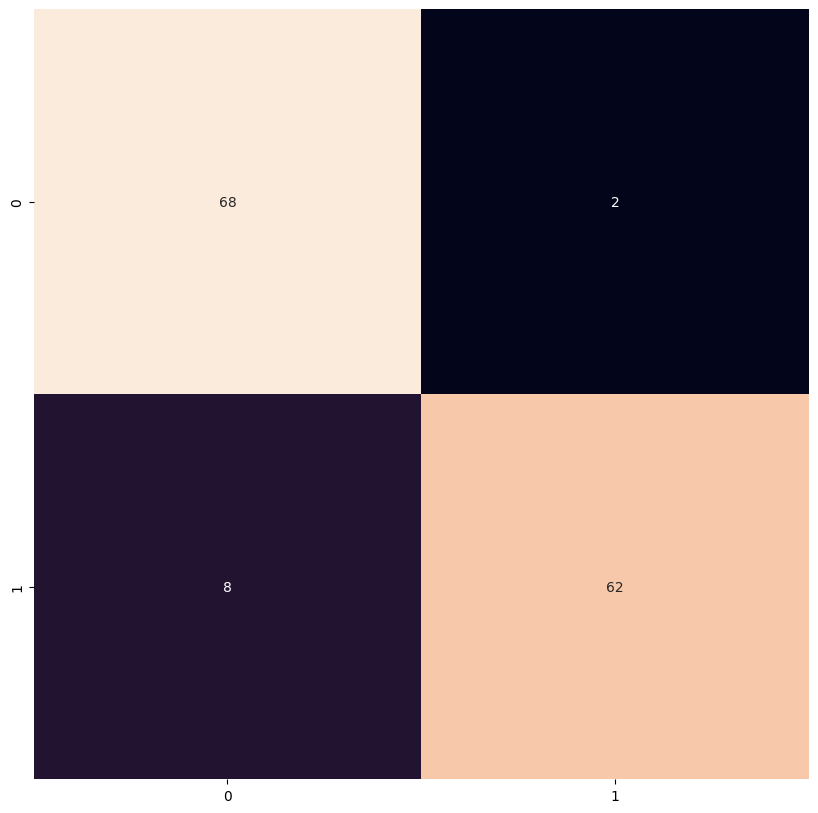

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

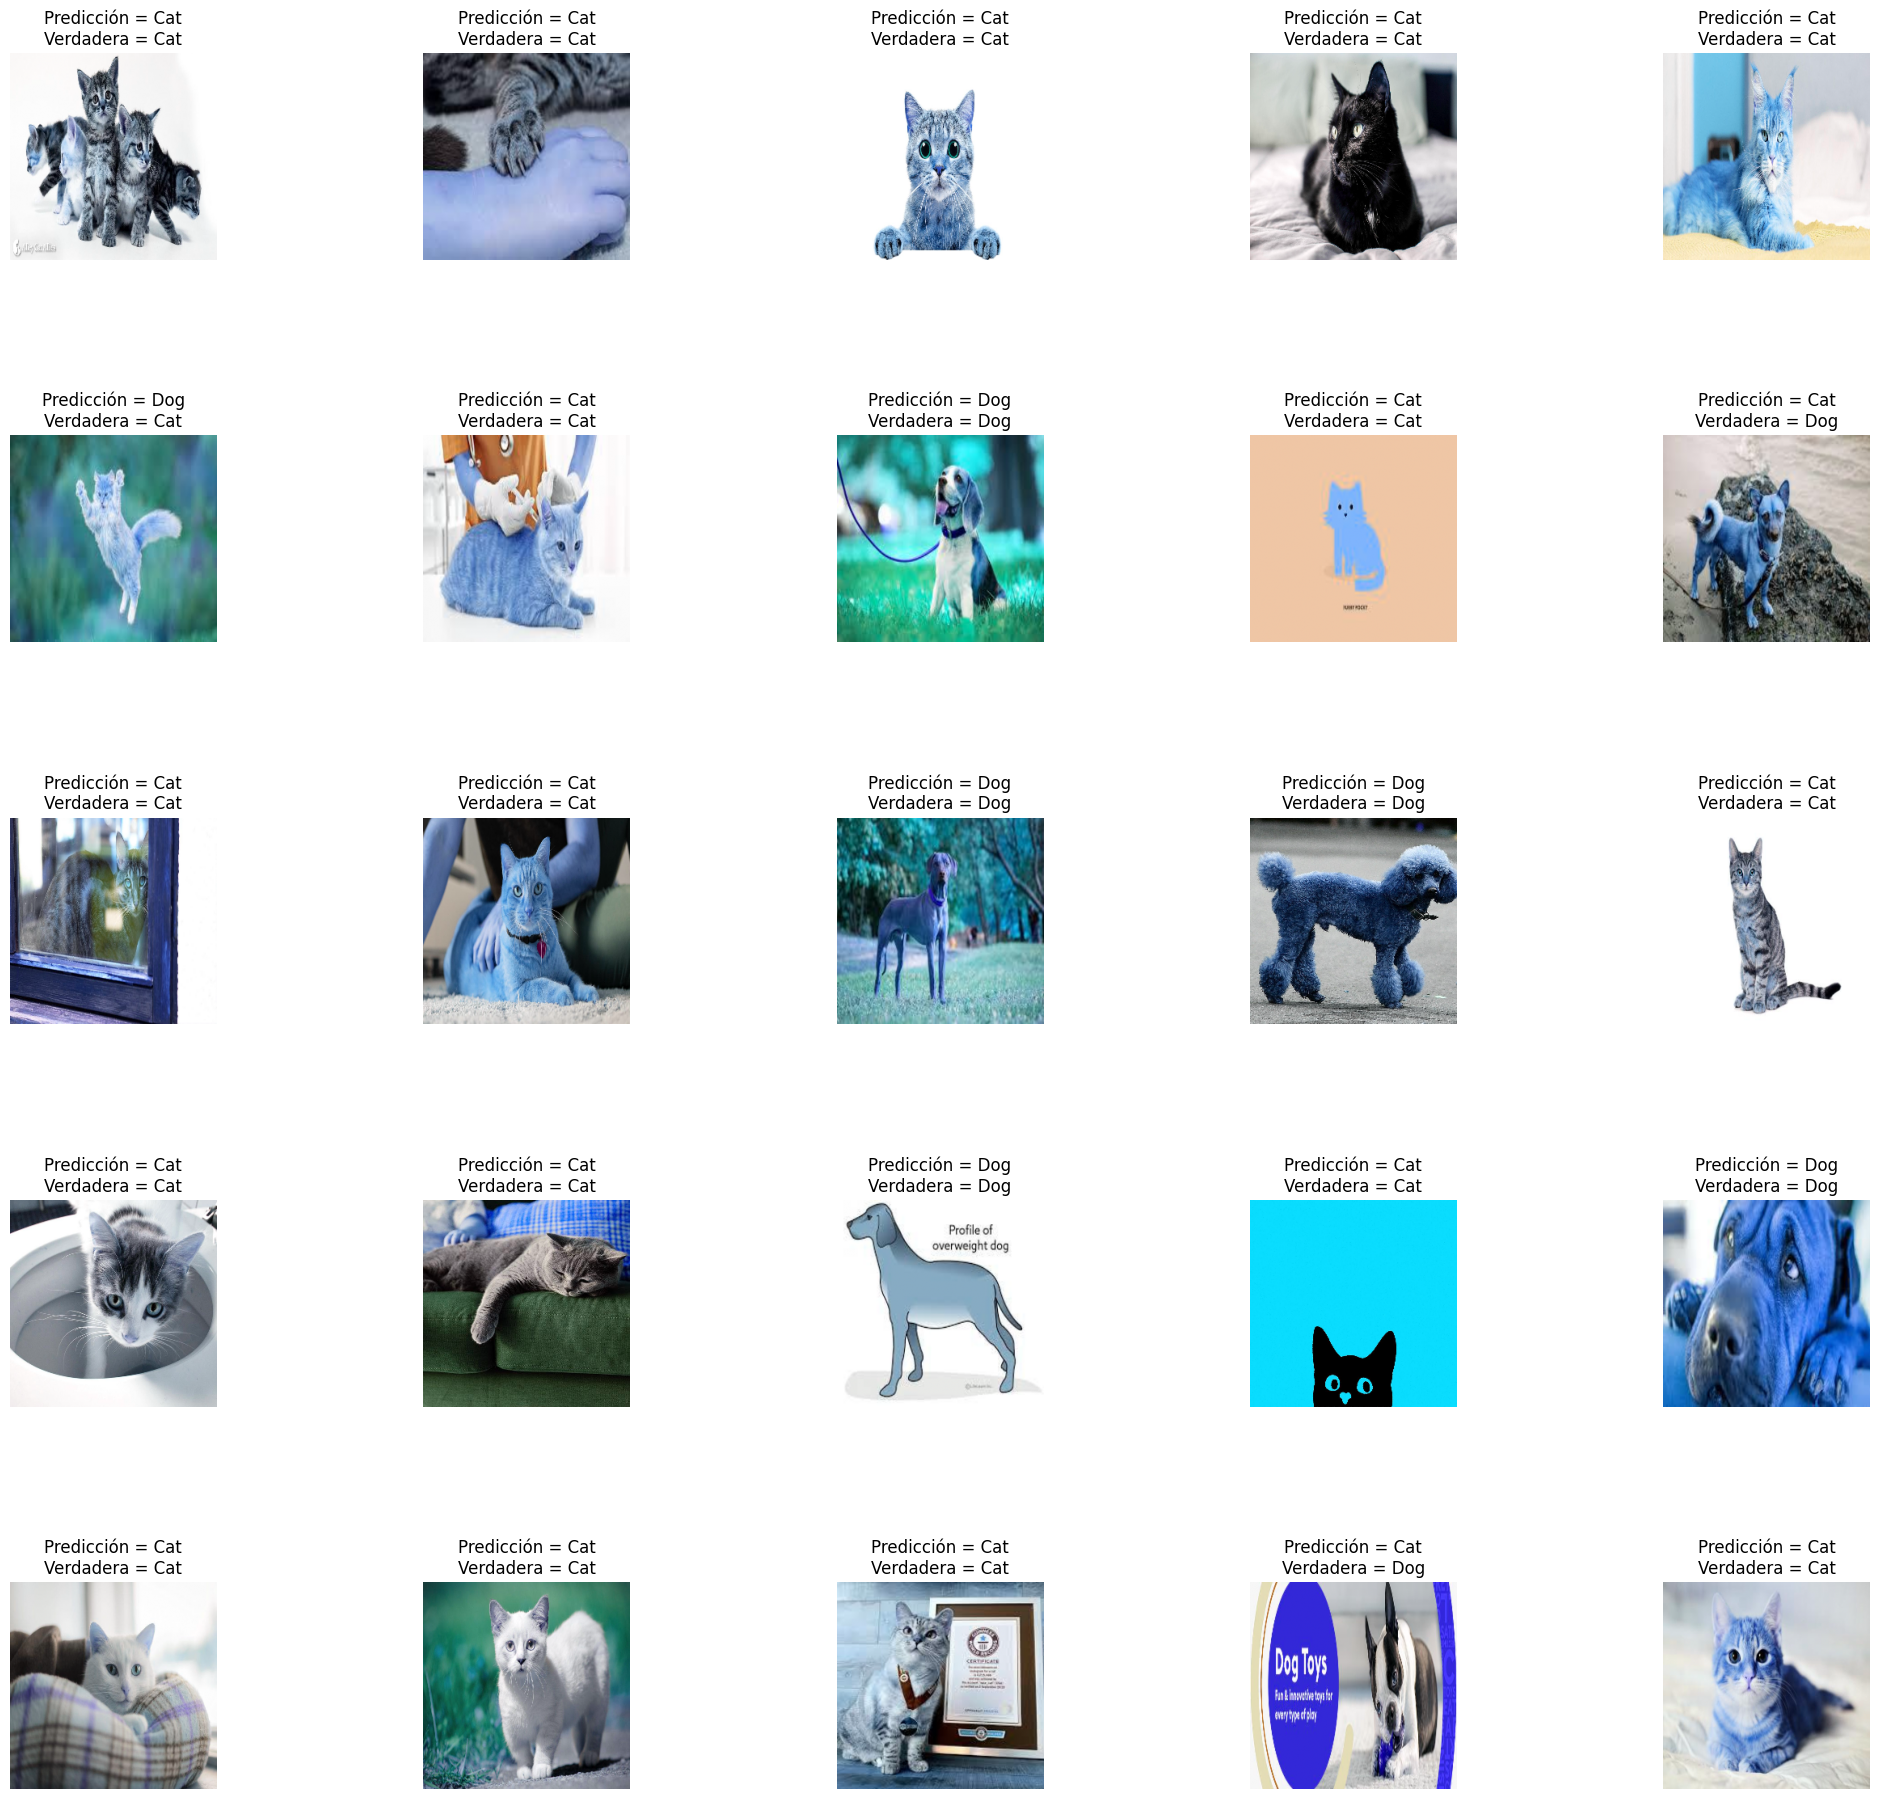

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize=(24, 24))
axes = axes.ravel()

random_indices = np.random.choice(len(images), size=L*W, replace=False)

for i, index in enumerate(random_indices):
    axes[i].imshow(images[index].reshape(256, 256, 3), cmap='gray')
    axes[i].set_title('Predicción = {}\nVerdadera = {}'.format(label_to_text[predicted_classes[index]], label_to_text[y_true[index]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()
